<h1 style="font-size:60px; color:White; background:#F7A100">Regression Analysis </h1>
<br>

# Introdoction

**This is a project to improve skills in the field of regression models. The purpose  as follows:**
- **<span style="color:Purple"> Intuitive </span> data analysis**  
-  **Data <span style="color:Purple"> preprocessing </span>**
- **Learning the concepts of <span style="color:Purple"> test and training data  </span>**
- **Using the <span style="color:Purple"> correlation</span> criterion to detect the relationship between variables**


## Data description

**The `Boston` housing dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Massachusetts. It has `506` samples and `14` variables. The response data is `medv` which is the median-value of owner-occupied homes in $1000. You can download it [here](http://lib.stat.cmu.edu/datasets/boston).**

> |Variable| Description|
 |:-------------|:-------------|
 |CRIM    | <b> Per capita crime rate by town |
 |ZN      | <b>Proportion of residential land zoned for lots over 25,000 sq.ft.|
 |INDUS   | <b> Proportion of non-retail business acres per town|
 |CHAS    | <b>Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
 |NOX     | <b>Nitric oxides concentration (parts per 10 million)|
 |RM      | <b>Average number of rooms per dwelling|
 |AGE     | <b>Proportion of owner-occupied units built prior to 1940|
 |DIS     | <b>Weighted distances to five Boston employment centres|
 |RAD     | <b>Index of accessibility to radial highways|
 |TAX     | <b>Full-value property-tax rate per 10,000 Dollar|
 |PTRATIO | <b>Pupil-teacher ratio by town|
 |BLACK   | <b>1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
 |LSTAT   | <b>Lower status of the population|
 |MEDV    | <b>Median value of owner-occupied homes in 1000's Dollar|

# Step 1: Preprocessing

- **<span style="color:Purple"> Reading </span>  data using the `pandas` package**
- **Checking the presence of <span style="color:Purple"> outlier data </span> using boxplot and interquartile range**
- **Checking the existence of  <span style="color:Purple"> missing value </span> using the `info` method**
- **Investigating the necessity of  <span style="color:Purple"> data scaling </span>**
- **<span style="color:Purple"> Data plot </span> and initial review and conclusion of the data trend (mental visualization)**
- **Draw the <span style="color:Purple"> scatterplot matrix </span>**
- **Checking the absence of <span style="color:Purple"> correlation </span> between predictors**

## Read data

In [ ]:
#Required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#Data scaling
from sklearn.preprocessing import MinMaxScaler

#train and test
from sklearn.model_selection import train_test_split

# Building a DT regression model
from sklearn.tree import DecisionTreeRegressor

#MSE
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree


#statsmodels
import statsmodels.api as sm

#Polynomial Regression
#from sklearn.preprocessing import PolynomialFeatures


#VIF
#from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
#Read data
Boston = pd.read_csv("/content/drive/MyDrive/eda1/BostonHousing.csv")


In [ ]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
Boston["chas"].value_counts()

,count
chas,
0,471
1,35


In [ ]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
#change type of Chas variable
Boston["chas"] = Boston["chas"].astype('category')

In [ ]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     506 non-null    float64 
 1   zn       506 non-null    float64 
 2   indus    506 non-null    float64 
 3   chas     506 non-null    category
 4   nox      506 non-null    float64 
 5   rm       501 non-null    float64 
 6   age      506 non-null    float64 
 7   dis      506 non-null    float64 
 8   rad      506 non-null    int64   
 9   tax      506 non-null    int64   
 10  ptratio  506 non-null    float64 
 11  b        506 non-null    float64 
 12  lstat    506 non-null    float64 
 13  medv     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


## Definition IQR function

In [ ]:
#function for calculate the IQR criterion
def iqr_func(data):
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    return iqr

In [ ]:
#function for detect outliers in data, base on IQR criterion
def outlier_func(data):
    outlier = []
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    for i in data :
        if (i > (q3 + 1.5 * iqr) or i < (q1 - 1.5 * iqr)):
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier

## Remove Outliers

In [ ]:
column_names = list(Boston.columns)
Boston_out   = pd.DataFrame()
for name in column_names:
    Boston_out[name] = outlier_func(Boston[name])


In [ ]:
Boston_out.drop('chas', inplace=True, axis=1)

In [ ]:
Boston_out.head(3)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
Boston_colsum = Boston_out.sum()
Boston_colsum

,0
crim,66
zn,68
indus,0
nox,0
rm,0
age,0
dis,5
rad,0
tax,0
ptratio,15


In [ ]:
Boston_rowsum = Boston_out.sum(axis = 1)
Boston_rowsum

,0
0,0
1,0
2,0
3,0
4,0
...,...
501,0
502,0
503,0
504,0


In [ ]:
list(Boston_rowsum[Boston_rowsum  == 4].index)

[]

In [ ]:
n_otlier_feature = 3
for j in range(len(Boston)):
    if Boston_rowsum[j] >= n_otlier_feature:
        Boston = Boston.drop(j)

In [ ]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     503 non-null    float64 
 1   zn       503 non-null    float64 
 2   indus    503 non-null    float64 
 3   chas     503 non-null    category
 4   nox      503 non-null    float64 
 5   rm       498 non-null    float64 
 6   age      503 non-null    float64 
 7   dis      503 non-null    float64 
 8   rad      503 non-null    int64   
 9   tax      503 non-null    int64   
 10  ptratio  503 non-null    float64 
 11  b        503 non-null    float64 
 12  lstat    503 non-null    float64 
 13  medv     503 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 55.6 KB


In [ ]:
Boston.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


## Data Scaling

In [ ]:
mms = MinMaxScaler()  # making all ranges same 0-1

In [ ]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     493 non-null    float64 
 1   zn       493 non-null    float64 
 2   indus    493 non-null    float64 
 3   chas     493 non-null    category
 4   nox      493 non-null    float64 
 5   rm       493 non-null    float64 
 6   age      493 non-null    float64 
 7   dis      493 non-null    float64 
 8   rad      493 non-null    int64   
 9   tax      493 non-null    int64   
 10  ptratio  493 non-null    float64 
 11  black    493 non-null    float64 
 12  lstat    493 non-null    float64 
 13  medv     493 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 54.5 KB


In [ ]:
Boston_scaling = mms.fit_transform(Boston.loc[:, Boston.columns != "chas"]) # changing all columns shape to normal---- z score normalisation / standardisation

In [ ]:
Boston_scaling = pd.DataFrame(Boston_scaling)

In [ ]:
Boston_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       503 non-null    float64
 1   1       503 non-null    float64
 2   2       503 non-null    float64
 3   3       503 non-null    float64
 4   4       498 non-null    float64
 5   5       503 non-null    float64
 6   6       503 non-null    float64
 7   7       503 non-null    float64
 8   8       503 non-null    float64
 9   9       503 non-null    float64
 10  10      503 non-null    float64
 11  11      503 non-null    float64
 12  12      503 non-null    float64
dtypes: float64(13)
memory usage: 51.2 KB


In [ ]:
Boston_scaling.columns = ['crim', 'zn','indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
                           'ptratio','black','lstat', 'medv']

In [ ]:
Boston_scaling.head(3)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,0.067815,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000


## Box Plot

![image-2.png](attachment:image-2.png)

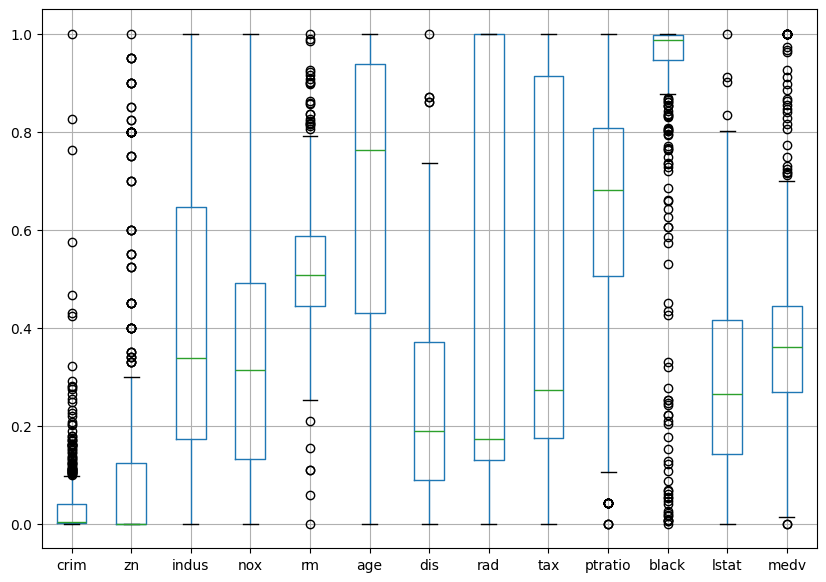

In [ ]:
fig = plt.figure(figsize =(10, 7))
boxplot = Boston_scaling.boxplot(column = list(Boston_scaling.columns))

## ScatterPlot

[Text(0.5, 0, 'indus'), Text(0, 0.5, 'medv')]

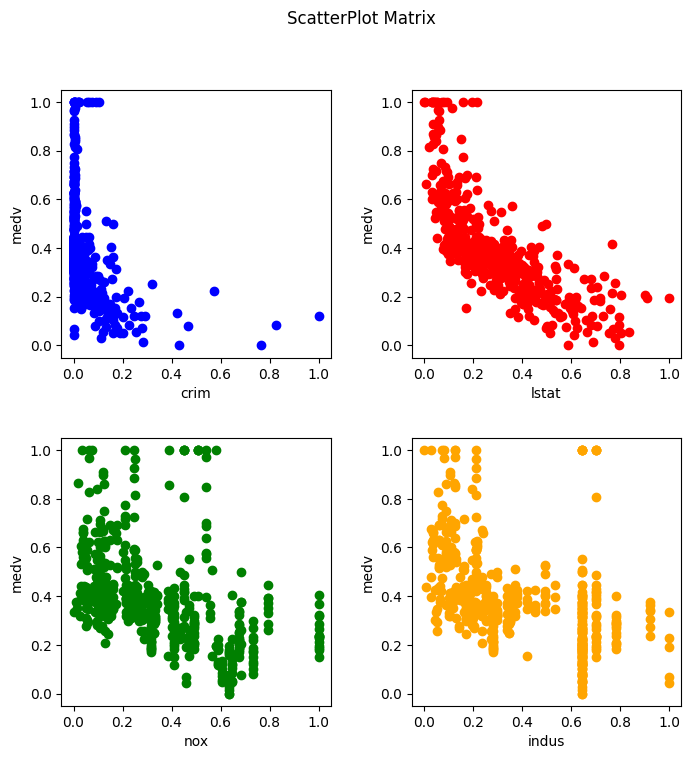

In [ ]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2, hspace=.3, wspace=.3)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='none', sharey='none')
fig.suptitle('ScatterPlot Matrix')
ax1.scatter(Boston_scaling["crim"], Boston_scaling["medv"], c ="blue")
ax1.set(xlabel='crim', ylabel='medv')
ax2.scatter(Boston_scaling["lstat"], Boston_scaling["medv"], c ="red")
ax2.set(xlabel='lstat', ylabel='medv')
ax3.scatter(Boston_scaling["nox"], Boston_scaling["medv"], c ="green")
ax3.set(xlabel='nox', ylabel='medv')
ax4.scatter(Boston_scaling["indus"], Boston_scaling["medv"], c ="orange")
ax4.set(xlabel='indus', ylabel='medv')

## Corrlation

In [ ]:
corrMatrix = Boston_scaling.corr()
print (corrMatrix)

             crim        zn     indus       nox        rm       age       dis  \
crim     1.000000 -0.198712  0.403546  0.417992 -0.193318  0.347296 -0.375742   
zn      -0.198712  1.000000 -0.532893 -0.516020  0.309920 -0.568788  0.663965   
indus    0.403546 -0.532893  1.000000  0.762738 -0.389228  0.642752 -0.706241   
nox      0.417992 -0.516020  0.762738  1.000000 -0.298312  0.730965 -0.768531   
rm      -0.193318  0.309920 -0.389228 -0.298312  1.000000 -0.232224  0.195433   
age      0.347296 -0.568788  0.642752  0.730965 -0.232224  1.000000 -0.746439   
dis     -0.375742  0.663965 -0.706241 -0.768531  0.195433 -0.746439  1.000000   
rad      0.622486 -0.309895  0.591762  0.608506 -0.196984  0.451425 -0.490140   
tax      0.579493 -0.312522  0.718725  0.665785 -0.281823  0.502562 -0.530561   
ptratio  0.286131 -0.390367  0.380269  0.184981 -0.353928  0.258092 -0.228765   
black   -0.357729  0.171710 -0.349578 -0.373797  0.097650 -0.263860  0.281875   
lstat    0.429638 -0.416678 

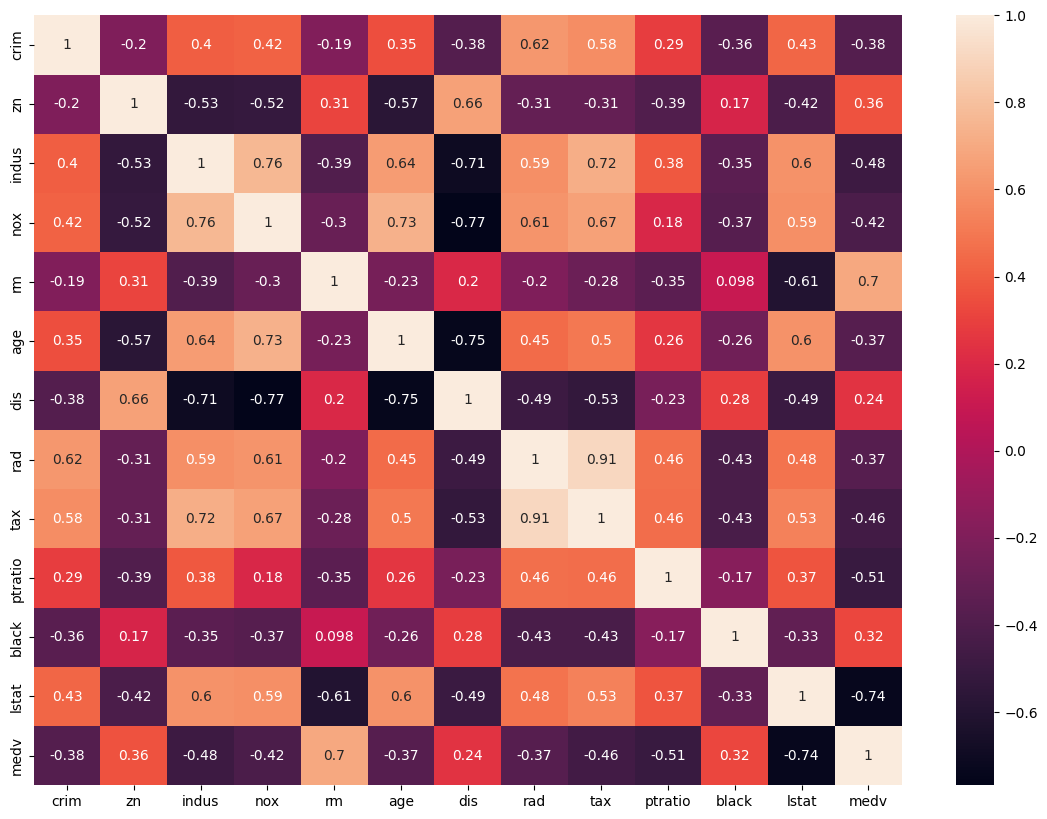

In [ ]:
fig = plt.figure(figsize =(14, 10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

# Step 2:  Regression

**USE-CASES:**
1. **House-price estimations using various variables like the area of the property, location, number of bedrooms, etc.**
2. **Stock price prediction models**

In [ ]:
Data_step2 = Boston_scaling.loc[:, ["medv", "lstat"]]

In [ ]:
#alternate way to train
#X = np.array(Boston_scaling['lstat'].reshape((-1,1)))
#y = np.array(Boston_scaling['medv'])
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)
#model.fit(X_train,y_train)

In [ ]:
# Dividing the data into training and test sets
#x train, ytrain, x test ,y test
data_train, data_test = train_test_split( Boston_scaling, test_size=0.20, random_state = 42)

In [ ]:
# Building a  regression model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor() # parameter?---- judgement/ default use---
x_train = np.array(data_train["lstat"]).reshape((-1, 1)) #.reshape((-1, 1)) converts the 1D array (shape: (n_samples,)) into a 2D array (shape: (n_samples, 1)).
#Decision Tree Regressors in sklearn require input features in a 2D array.
#data_train[["lstat","age"]] if training on 2 or more columns
y_train = np.array(data_train["medv"]) #1D
model.fit(x_train,y_train) #learns from training data

#test how well it works ?? test data


DecisionTreeRegressor()

### R_Square

In [ ]:
r_sq = model.score(x_train, y_train)
print(f"R2: {r_sq}")

coefficient of determination: 0.9577223165790554


**The result of `R2` indicates that the predictor variable (lstat) was able to explain (determine) nearly 95% of the response or target variable (medv).Actually, our model, based on this prediction, is/ considered a good fit since the prediction accuracy is above 85% to 90%. Therefore, there is a np need to strengthen our model.**

**`R2` indicates how effectively a model can predict the value of the response variable in terms of percentage.**

**This coefficient indicates that with each percentage increase in the population within each area, on average, the mean value of expensive homes (in thousands of dollars) decreases by 0.6.**

## MSE

In [ ]:
mean_squared_error(y_train, model.predict(x_train)) #mean_squared_error(Y_true,Y_pred)

0.0018086174067931942

**A lower value of MSE is preferred.**

In [ ]:
x_test = np.array(data_test["lstat"]).reshape((-1, 1))
y_test = np.array(data_test["medv"])

mean_squared_error(y_test, model.predict(x_test)) #mean_squared_error(Y_true,Y_pred)

0.024088140542449305

**These results demonstrate that your regression model has, on average, provided more accurate predictions of the actual values. In essence, a smaller difference between the predicted and actual variables, indicating a lower percentage of error, is desirable. This is precisely the outcome we aim to achieve with our model.**


## Draw the tree

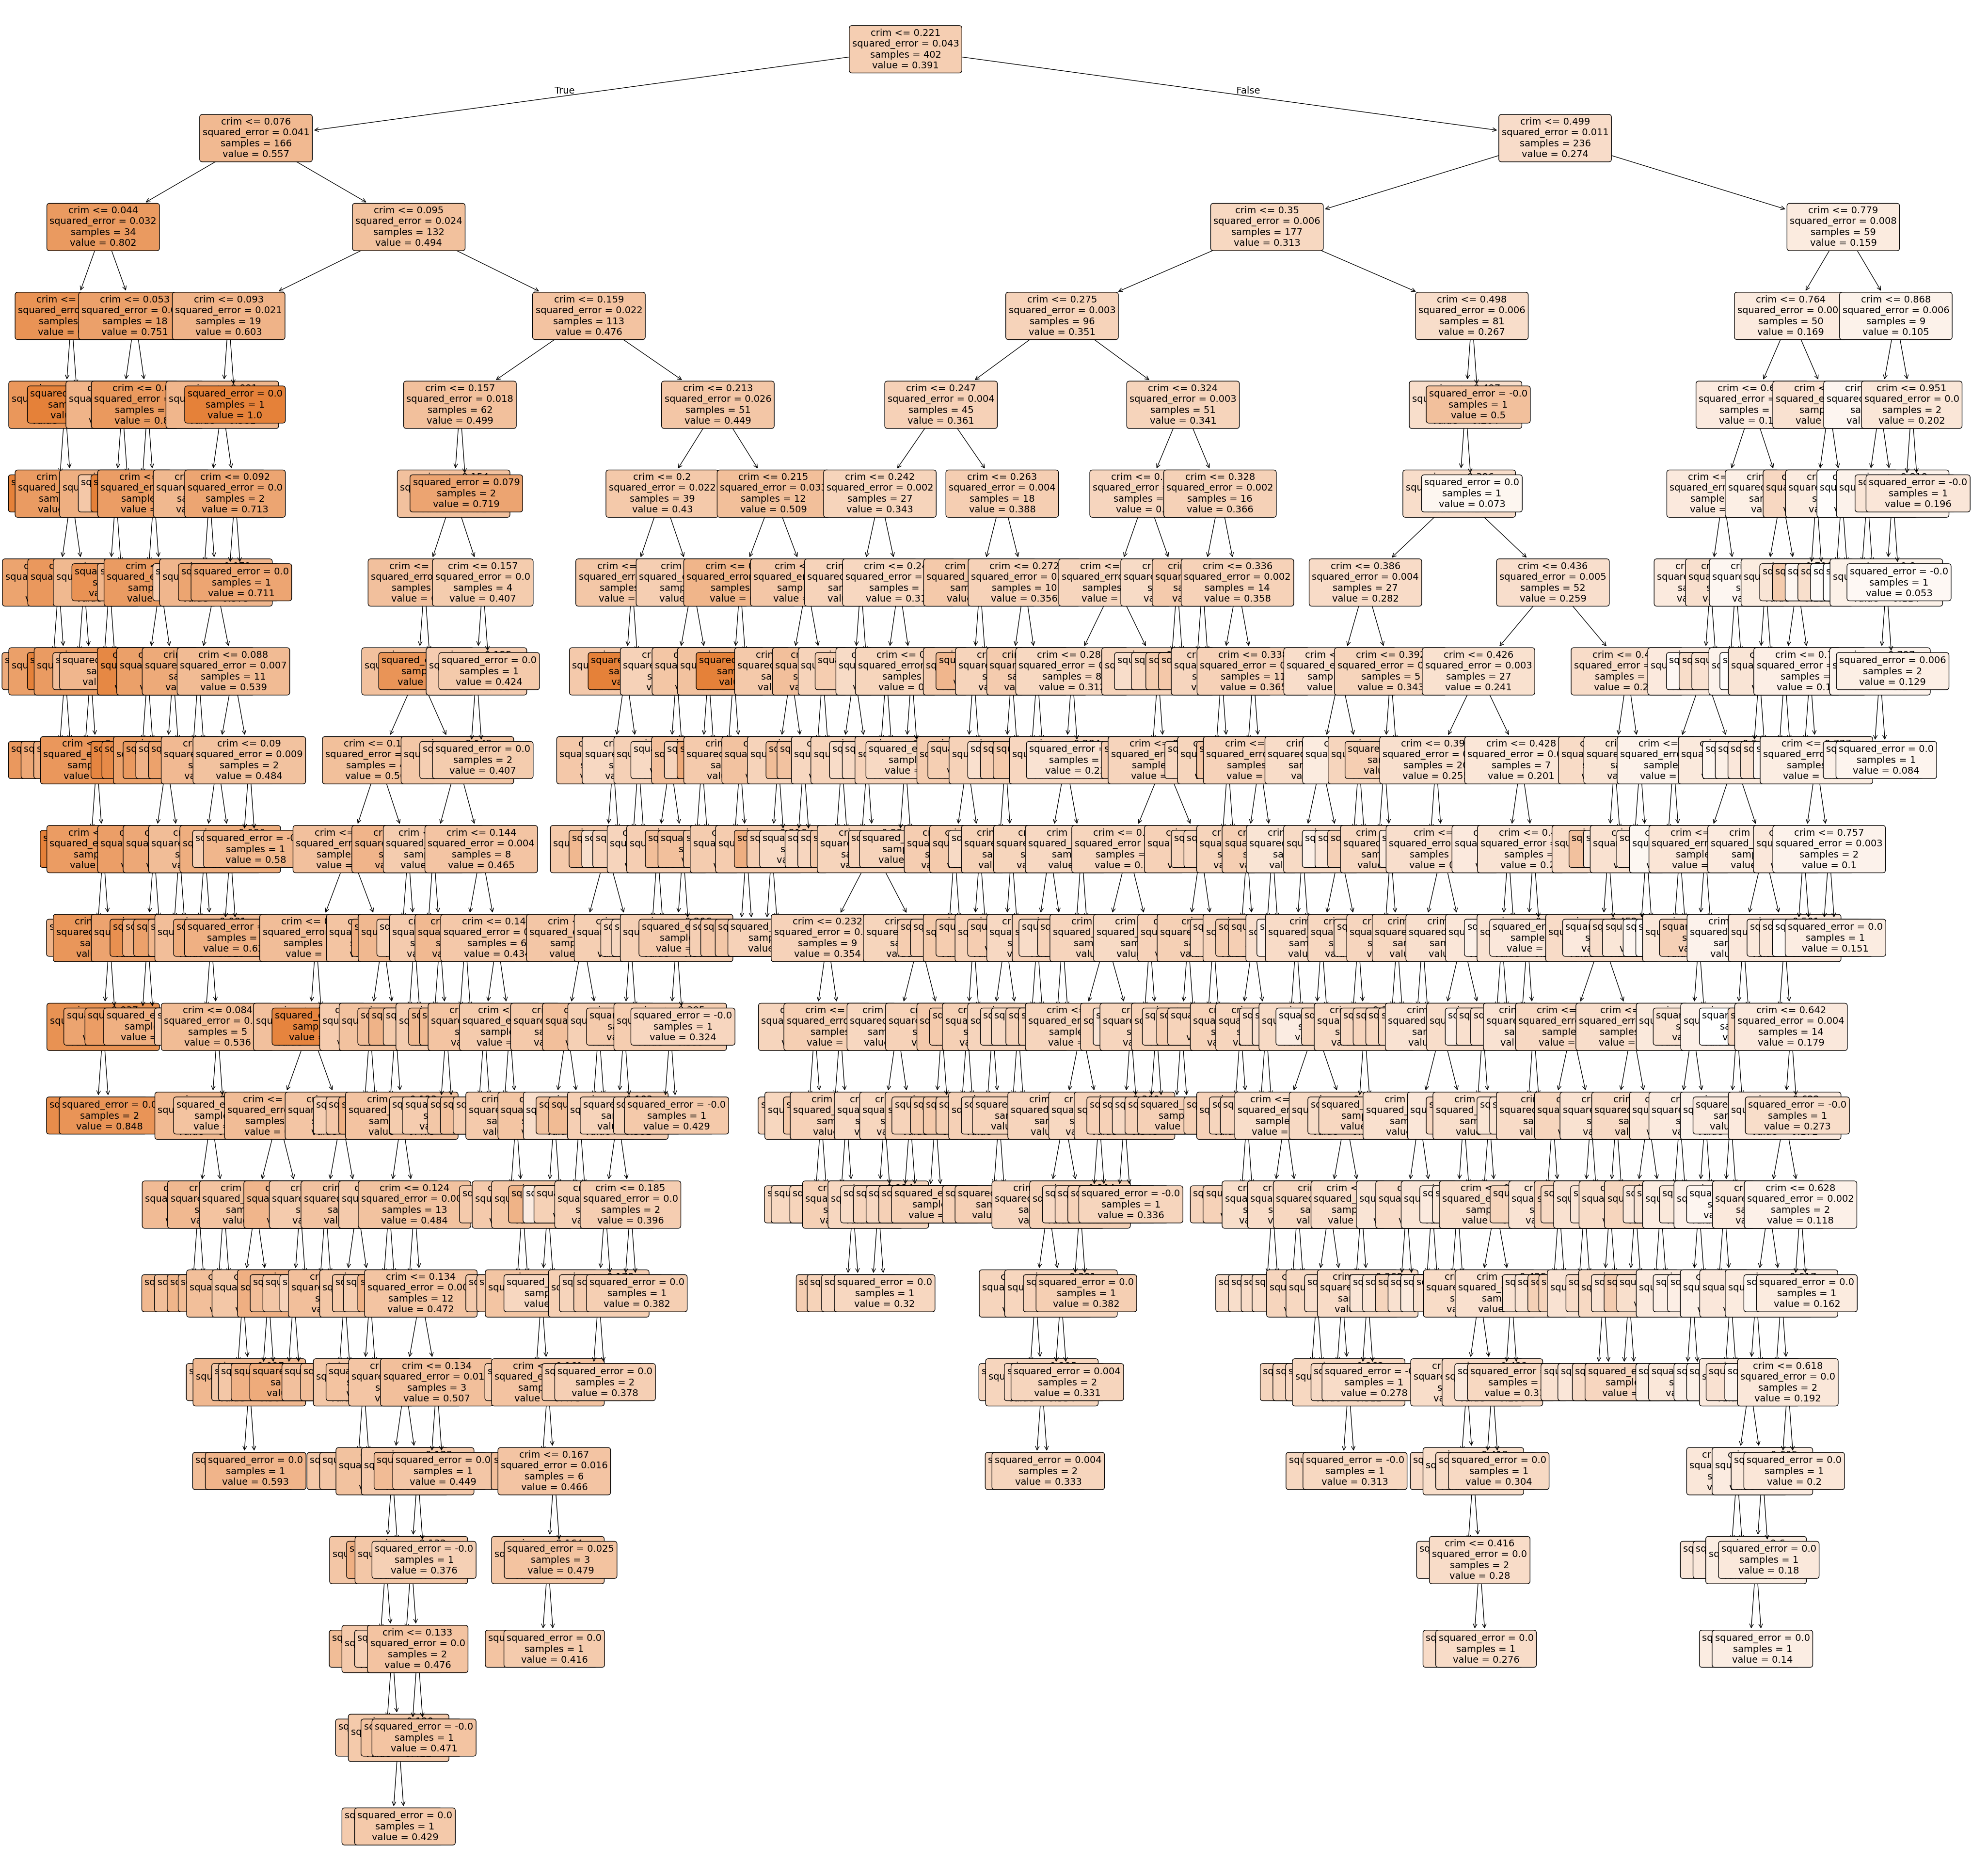

In [ ]:
plt.figure(figsize=(50,50))
a = plot_tree(model,
              feature_names=X.columns, #???
              class_names=Y, #??
              filled=True,
              rounded=True,
              fontsize=14)

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'splitter': ['best', 'random']
}
# Performing GridSearchCV
grid_search = GridSearchCV(model, cv=5, param_grid=param)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_estimator_)
print("Best Score (R2):", grid_search.best_score_)

# Evaluating on test data
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score (R2):", test_score)

Best Parameters: DecisionTreeRegressor(max_depth=20, min_samples_split=20, splitter='random')
Best Score (R2): 0.6467870844958481
Test Score (R2): 0.7075052950408331
